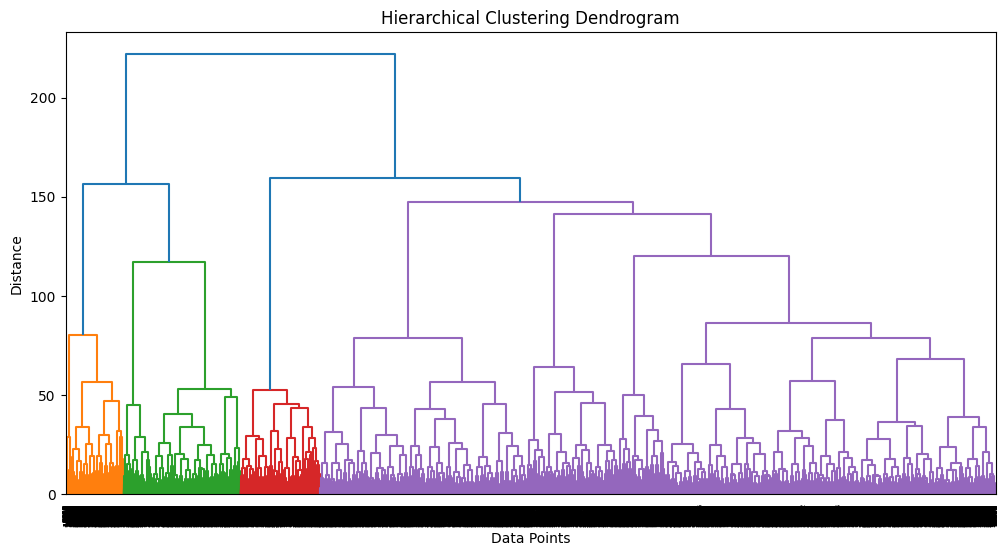

Cross-Validation Scores: [0.43368056 0.43383119 0.41646405 0.42792636 0.42341091]
Mean Cross-Validation Score: 0.43
Accuracy: 0.41

Confusion Matrix:
[[ 72   0   6  12   9   1   4   7   0  11  14]
 [  2   4   6   1   0  10  99   4  10  19 131]
 [  4   0  88   8   0   5  16   3   2  39 116]
 [ 15   0   3  30   5   4   3   4   0  13   1]
 [ 15   0   0   4  30   0   0   0   0  13   9]
 [  0   2   9   0   0 160  15   0   2  48  26]
 [  2  72  15   1   2  23  79   2  16  67 221]
 [  3   0   0   1   1   0   3  95   0   0   0]
 [  0   0   1   0   0   0  14   1 180   5 181]
 [ 10   5  21   6   3  41  46   0   5 205 189]
 [  6  54  50   1  11   8 102   1 118 102 517]]

Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.53      0.54       136
           1       0.03      0.01      0.02       286
           2       0.44      0.31      0.37       281
           3       0.47      0.38      0.42        78
           4       0.49      0.42    

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering

# Load your music dataset
# Replace 'train.csv' with the actual file path or URL of your dataset
music_data = pd.read_csv('train.csv')

# Drop non-numeric columns like 'Artist Name' and 'Track Name' for simplicity
music_data_numeric = music_data.drop(['Artist Name', 'Track Name'], axis=1)

# Handle categorical variables using Label Encoding
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
music_data_numeric['Class'] = label_encoder.fit_transform(music_data_numeric['Class'])

# Split the data into features (X) and target variable (y)
X = music_data_numeric.drop('Class', axis=1)
y = music_data_numeric['Class']

# Impute missing values
imputer = SimpleImputer(strategy='mean')  # You can use other strategies like 'median' or 'most_frequent'
X_imputed = imputer.fit_transform(X)

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Apply PCA to reduce dimensionality
pca = PCA(n_components=10)  # Choose the number of components based on your requirements
X_pca = pca.fit_transform(X_scaled)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(rf_classifier, X_train, y_train, cv=5)

# Train the classifier on the training set
rf_classifier.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = rf_classifier.predict(X_test)

# Evaluate the performance of the classifier
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Hierarchical Clustering
linkage_matrix = linkage(X_pca, method='ward')

# Plot the dendrogram
plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

# Print the results
print("Cross-Validation Scores:", cv_scores)
print(f"Mean Cross-Validation Score: {cv_scores.mean():.2f}")
print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Load your music dataset
# Replace 'train.csv' with the actual file path or URL of your dataset
music_data = pd.read_csv('train.csv')

# Drop non-numeric columns like 'Artist Name' and 'Track Name' for simplicity
music_data_numeric = music_data.drop(['Artist Name', 'Track Name'], axis=1)

# Handle categorical variables using Label Encoding
label_encoder = LabelEncoder()
music_data_numeric['Class'] = label_encoder.fit_transform(music_data_numeric['Class'])

# Split the data into features (X) and target variable (y)
X = music_data_numeric.drop('Class', axis=1)
y = music_data_numeric['Class']

# Impute missing values
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [4]:
from sklearn.decomposition import PCA

# Apply PCA to reduce dimensionality
pca = PCA(n_components=10)  # Choose the number of components based on your requirements
X_pca = pca.fit_transform(X_scaled)


In [5]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(rf_classifier, X_scaled, y, cv=5)
print("Cross-Validation Scores:", cv_scores)
print(f"Mean Cross-Validation Score: {cv_scores.mean():.2f}")


Cross-Validation Scores: [0.51972222 0.50291748 0.50458461 0.48680189 0.49652681]
Mean Cross-Validation Score: 0.50


In [6]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Train the classifier on the training set
rf_classifier.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = rf_classifier.predict(X_test)

# Evaluate the performance of the classifier
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)


Accuracy: 0.50

Confusion Matrix:
[[109   0   0   8   9   0   0   5   0   4   1]
 [  0   7   6   0   0   9 105   0   5  20 134]
 [  0   0 104   0   0   4  19   0   1  23 130]
 [  9   0   0  60   3   0   0   4   0   2   0]
 [ 14   0   0   0  49   0   0   0   0   6   2]
 [  0   1   4   0   0 186  10   0   0  45  16]
 [  0  70  10   0   0  19 131   0  11  54 205]
 [  5   0   0   3   0   0   0  95   0   0   0]
 [  0   0   0   0   0   0  11   0 202   2 167]
 [  9   6  16   2   7  41  46   0   2 283 119]
 [  4  53  35   2  10   9  95   0  94  87 581]]

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.80      0.76       136
           1       0.05      0.02      0.03       286
           2       0.59      0.37      0.46       281
           3       0.80      0.77      0.78        78
           4       0.63      0.69      0.66        71
           5       0.69      0.71      0.70       262
           6       0.31      0.26      0.29  

Cross-Validation Scores: [0.51972222 0.50291748 0.50458461 0.48680189 0.49652681]
Mean Cross-Validation Score: 0.50


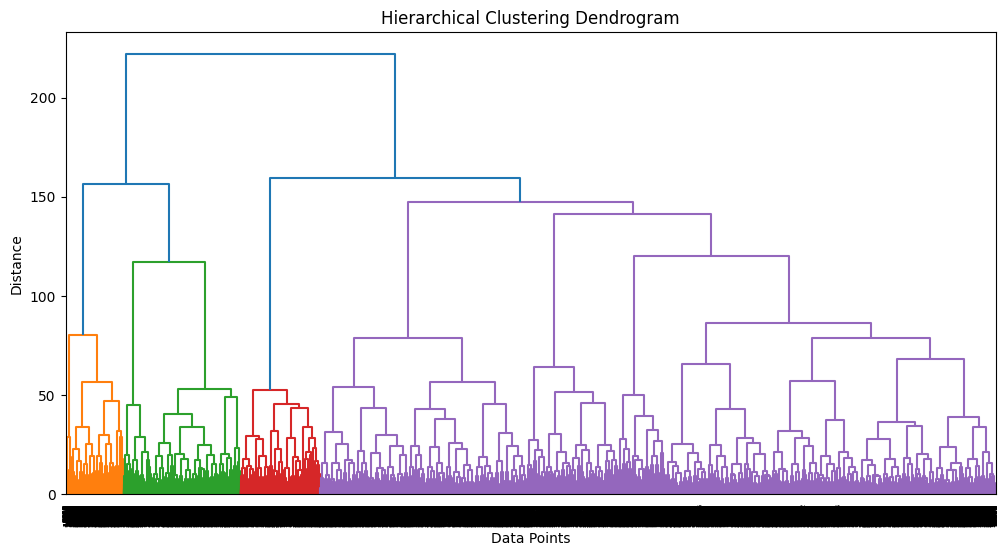

Accuracy: 0.50

Confusion Matrix:
[[109   0   0   8   9   0   0   5   0   4   1]
 [  0   7   6   0   0   9 105   0   5  20 134]
 [  0   0 104   0   0   4  19   0   1  23 130]
 [  9   0   0  60   3   0   0   4   0   2   0]
 [ 14   0   0   0  49   0   0   0   0   6   2]
 [  0   1   4   0   0 186  10   0   0  45  16]
 [  0  70  10   0   0  19 131   0  11  54 205]
 [  5   0   0   3   0   0   0  95   0   0   0]
 [  0   0   0   0   0   0  11   0 202   2 167]
 [  9   6  16   2   7  41  46   0   2 283 119]
 [  4  53  35   2  10   9  95   0  94  87 581]]

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.80      0.76       136
           1       0.05      0.02      0.03       286
           2       0.59      0.37      0.46       281
           3       0.80      0.77      0.78        78
           4       0.63      0.69      0.66        71
           5       0.69      0.71      0.70       262
           6       0.31      0.26      0.29  

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Load your music dataset
# Replace 'train.csv' with the actual file path or URL of your dataset
music_data = pd.read_csv('train.csv')

# Drop non-numeric columns like 'Artist Name' and 'Track Name' for simplicity
music_data_numeric = music_data.drop(['Artist Name', 'Track Name'], axis=1)

# Handle categorical variables using Label Encoding
label_encoder = LabelEncoder()
music_data_numeric['Class'] = label_encoder.fit_transform(music_data_numeric['Class'])

# Split the data into features (X) and target variable (y)
X = music_data_numeric.drop('Class', axis=1)
y = music_data_numeric['Class']

# Impute missing values
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Apply PCA to reduce dimensionality
pca = PCA(n_components=10)  # Choose the number of components based on your requirements
X_pca = pca.fit_transform(X_scaled)

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(rf_classifier, X_scaled, y, cv=5)
print("Cross-Validation Scores:", cv_scores)
print(f"Mean Cross-Validation Score: {cv_scores.mean():.2f}")

# Hierarchical Clustering
linkage_matrix = linkage(X_pca, method='ward')

# Plot the dendrogram
plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

# Train the classifier on the training set
rf_classifier.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = rf_classifier.predict(X_test)

# Evaluate the performance of the classifier
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)
